In [1]:
import pandas as pd
import numpy as np

In [2]:
start_date = '2010-08-01'
end_date = '2021-07-01'
end_t_date = '2021-05-31'

In [3]:
file_path = 'inflation_HICP_monthly.csv'

# Read the TSV file into a pandas DataFrame
df_3 = pd.read_csv(file_path)
df_3['DATE'] = pd.to_datetime(df_3['DATE'])

# Set 'DATE' as the index
df_3.set_index('DATE', inplace=True)



# Now perform the slicing
y = df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'].rename('HICP')['2010-08-01':'2021-06-01']
y.rename_axis(None, inplace=True)

print(y)

2010-08-31    1.6
2010-09-30    1.9
2010-10-31    1.9
2010-11-30    1.9
2010-12-31    2.2
             ... 
2021-01-31    0.9
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
Name: HICP, Length: 130, dtype: float64


In [4]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'], model='additive')  # Use 'multiplicative' if more appropriate
seasonal = result.seasonal[start_date:end_date]
trend = result.trend[start_date:end_date]
residuals = result.resid[start_date:end_date]
residuals.rename('HICP', inplace=True)

DATE
2010-08-31   -0.183939
2010-09-30   -0.017278
2010-10-31   -0.149329
2010-11-30   -0.228175
2010-12-31    0.025030
                ...   
2021-02-28    0.016055
2021-03-31    0.107722
2021-04-30    0.049869
2021-05-31    0.053395
2021-06-30   -0.484425
Name: HICP, Length: 131, dtype: float64

In [5]:
residuals

DATE
2010-08-31   -0.183939
2010-09-30   -0.017278
2010-10-31   -0.149329
2010-11-30   -0.228175
2010-12-31    0.025030
                ...   
2021-02-28    0.016055
2021-03-31    0.107722
2021-04-30    0.049869
2021-05-31    0.053395
2021-06-30   -0.484425
Name: HICP, Length: 131, dtype: float64

In [6]:
#Euro Libor rate data loading
Libor= pd.read_csv('LIBOR EUR.csv')
Libor['Date'] = pd.to_datetime(Libor['Date'], format='%d.%m.%Y')
Libor.set_index('Date', inplace=True)
Libor.interpolate(method = 'linear', inplace=True)	

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\372872800.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Libor.interpolate(method = 'linear', inplace=True)


In [7]:
#German bund yieald data loding
German_yeald = pd.read_csv('Germany 10-Year Bond Yield.csv')
German_yeald['Date'] = pd.to_datetime(German_yeald['Date'])
German_yeald.set_index('Date', inplace=True)
German_yeald.sort_index(inplace=True)
German_yeald = German_yeald
German_yeald.interpolate(method = 'linear', inplace=True)	

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\1113626872.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  German_yeald.interpolate(method = 'linear', inplace=True)


In [8]:
#Fibor data loading
Fibor = pd.read_csv('FIBOR.csv')
Fibor['DATE'] = pd.to_datetime(Fibor['DATE'])
Fibor.set_index('DATE', inplace=True)
# Resample Fibor DataFrame to daily frequency
Fibor_daily = Fibor.asfreq('D', method='ffill')
Fibor_daily = Fibor_daily[start_date:end_date]
#calculate the spread between the 3 months fibor and the 10 years German bund
cr_spread = pd.concat((Fibor_daily['IR3TIB01DEM156N'], German_yeald['Price']), axis=1)
cr_spread = cr_spread.interpolate()
cr_spread = cr_spread.fillna(method='bfill')
credit_spread = cr_spread['Price'] - cr_spread['IR3TIB01DEM156N']
credit_spread.interpolate(method = 'linear', inplace=True)	

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\3621557867.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cr_spread = cr_spread.fillna(method='bfill')


In [9]:
file_path = 'USD_EUR Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_5 = pd.read_csv(file_path)
df_5['DATE'] = pd.to_datetime(df_5['Date'])
# # Set 'DATE' as the index
df_5.set_index('DATE', inplace=True)
df_5.sort_index(inplace=True)
# Now perform the slicing
ex_rate = df_5['Price'].rename('USD/EUR exchange rate')
# y.rename_axis(None, inplace=True)
df_5.interpolate(method = 'linear', inplace=True)

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\282777116.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_5.interpolate(method = 'linear', inplace=True)


In [10]:
file_path = 'Euro Stoxx 50 Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_6 = pd.read_csv(file_path)
df_6['DATE'] = pd.to_datetime(df_6['Date'])
# # Set 'DATE' as the index
df_6.set_index('DATE', inplace=True)
df_6.sort_index(inplace=True)
# y.rename_axis(None, inplace=True)
df_6['Price'] = df_6['Price'].str.replace(',', '').astype(float)
# Now perform the slicing
eu50 = df_6['Price'].rename('Eurostoxx50_index')
eu50.interpolate(method = 'linear', inplace=True)	
# y.rename_axis(None, inplace=True)

In [11]:
file_path = 'CNY_EUR Historical Data.csv'
# Read the TSV file into a pandas DataFrame
df_7 = pd.read_csv(file_path)
df_7['DATE'] = pd.to_datetime(df_7['Date'])
# # Set 'DATE' as the index
df_7.set_index('DATE', inplace=True)
df_7.sort_index(inplace=True)
# Now perform the slicing
ex_rate_cny = df_7['Price'].rename('EUR/CNY exchange rate')
# y.rename_axis(None, inplace=True)
df_7.interpolate(method = 'linear', inplace=True)	

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\729023213.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_7.interpolate(method = 'linear', inplace=True)


In [12]:
# Specify the file path
file_path = 'crude_oil_daily+other.csv'

# Read the TSV file into a pandas DataFrame
df_4 = pd.read_csv(file_path)

df_4['Date'] = pd.to_datetime(df_4['Date'])

# Set 'DATE' as the index
df_4.set_index('Date', inplace=True)

# Select the desired columns and date range
#oil data loading
file_path = 'crude_oil_daily+other.csv'
df_4 = pd.read_csv(file_path)
df_4['Date'] = pd.to_datetime(df_4['Date'])
# Set 'DATE' as the index
df_4.set_index('Date', inplace=True)

# Select the desired columns and date range
x1 = df_4['Brent Oil'].rename('OIL')[start_date:end_date].pct_change(7)
x2 = df_4['Brent Oil'].rename('OIL_7')[start_date:end_date].pct_change(7)
# Specify the file path
Libor.sort_index(inplace=True)
x3 = Libor['3M'].rename('LIBOR_3M').pct_change(14)
x3 = x3[start_date:end_date]
x4 = credit_spread.rename('INTEREST_SPREAD')[start_date:end_date].pct_change(7)
x5 = ex_rate.rename('USD/EUR exchange rate')[start_date:end_date].pct_change(14)
x6 = eu50.rename('Eurostoxx50_index')[start_date:end_date].pct_change(7)
x7 = ex_rate_cny.rename('EUR/CNY exchange rate')[start_date:end_date].pct_change(7)
x8 = German_yeald['Price'].rename('German 10 years yeald')[start_date:end_date].pct_change(7)


In [13]:
exogenous = pd.concat([x1, x3, x4, x5, x6, x7], axis=1)
exogenous.interpolate(method='linear', inplace=True)
exogenous.fillna(method='ffill', inplace=True)
exogenous.fillna(method='bfill', inplace=True)

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\1548447969.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous.fillna(method='ffill', inplace=True)
C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\1548447969.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exogenous.fillna(method='bfill', inplace=True)


In [14]:

if exogenous.isnull().values.any():
    print("There are missing values in df.")
else:
    print("There are no missing values in df.")
print (exogenous)



There are no missing values in df.
                 OIL  LIBOR_3M  INTEREST_SPREAD  USD/EUR exchange rate  \
2010-08-01  0.025326  0.072981        -0.090613               0.037306   
2010-08-02  0.025326  0.072981        -0.090613               0.037306   
2010-08-03  0.025326  0.073840        -0.090613               0.037306   
2010-08-04  0.025326  0.062797        -0.090613               0.037306   
2010-08-05  0.025326  0.048428        -0.090613               0.037306   
...              ...       ...              ...                    ...   
2021-06-27  0.036322  0.004096         0.090200               0.005459   
2021-06-28 -0.002937  0.007577        -0.035144               0.005459   
2021-06-29 -0.000668  0.003906        -0.031421               0.005459   
2021-06-30 -0.000798  0.003898        -0.065951               0.005459   
2021-07-01  0.003706 -0.006223        -0.033877               0.005459   

            Eurostoxx50_index  EUR/CNY exchange rate  
2010-08-01          -

In [15]:
cd lag-llama

c:\Users\abahe\OneDrive\Documents\subjects\Bachelor's_thesis\midaspy\lag-llama


c:\Users\abahe\OneDrive\Documents\subjects\Bachelor's_thesis\midaspy\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [16]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd
import gluonts

from lag_llama.gluon.estimator import LagLlamaEstimator

c:\Users\abahe\OneDrive\Documents\subjects\Bachelor's_thesis\midaspy\.venv\lib\site-packages\gluonts\json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [17]:
def get_lag_llama_predictions(dataset, prediction_length, num_samples=100):
    ckpt = torch.load("lag-llama.ckpt", map_location=torch.device('cpu'))
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=32, # Should not be changed; this is what the released Lag-Llama model was trained with

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],

        batch_size=1,
        num_parallel_samples=100
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss

In [18]:
Lama_dataset = pd.concat([y, exogenous], axis=1)
#Lama_dataset = pd.concat([residuals, exogenous], axis=1)
Lama_dataset.fillna(method='bfill', inplace=True)
# have daily and monthly data in Lama_dataset. For all the missing values in montly data, I have Nanv values. Please fill the missing values with data for that month 
#Lama_dataset.fillna(method='ffill', inplace=True)
Lama_dataset.dropna(inplace = True)
Lama_dataset.head(15)

C:\Users\abahe\AppData\Local\Temp\ipykernel_23656\2010033229.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Lama_dataset.fillna(method='bfill', inplace=True)


,HICP,OIL,LIBOR_3M,INTEREST_SPREAD,USD/EUR exchange rate,Eurostoxx50_index,EUR/CNY exchange rate
2010-08-01,1.6,0.025326,0.072981,-0.090613,0.037306,-0.036903,0.026786
2010-08-02,1.6,0.025326,0.072981,-0.090613,0.037306,-0.036903,0.026786
2010-08-03,1.6,0.025326,0.073840,-0.090613,0.037306,-0.036903,0.026786
2010-08-04,1.6,0.025326,0.062797,-0.090613,0.037306,-0.036903,0.026786
2010-08-05,1.6,0.025326,0.048428,-0.090613,0.037306,-0.036903,0.026786
2010-08-06,1.6,0.025326,0.032482,-0.090613,0.037306,-0.036903,0.026786
2010-08-07,1.6,0.025326,0.030900,-0.090613,0.037306,-0.036903,0.026786
2010-08-08,1.6,0.025326,0.029317,-0.090613,0.037306,-0.036903,0.026786
2010-08-09,1.6,0.002103,0.027735,-0.096266,0.037306,-0.036903,0.026786
2010-08-10,1.6,-0.037252,0.023785,-0.041411,0.037306,-0.036903,0.026786


In [19]:
Lama_dataset = Lama_dataset.astype('float32')


In [20]:
print(Lama_dataset.dtypes)


HICP                     float32
OIL                      float32
LIBOR_3M                 float32
INTEREST_SPREAD          float32
USD/EUR exchange rate    float32
Eurostoxx50_index        float32
EUR/CNY exchange rate    float32
dtype: object


In [21]:

data = PandasDataset(Lama_dataset, target = 'HICP') 


In [22]:
# Ensure that the indices you are using are integers
backtest_dataset = data
prediction_length = 30  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timestep


In [23]:
# fcst = []
# import pandas as pd
# start_date = pd.to_datetime('2010-08-01')
# end_date = pd.to_datetime('2019-07-01')

# while end_date <= pd.to_datetime('2021-06-01'):
#     # Create a new dataframe with the desired end date
#     df = Lama_dataset[start_date:end_date]
#     df = PandasDataset(df, target = 'HICP') 
#     forecasts, tss = get_lag_llama_predictions(df, prediction_length, num_samples)
#     fcst.append(forecasts)
#     # Perform operations on the dataframe
    
#     # Increase the end date by one month
#     end_date += pd.DateOffset(months=1)


In [24]:
import pandas as pd

fcst = []

# Initialize start and end dates
start_date = pd.to_datetime('2010-08-01')
end_date = pd.to_datetime('2019-07-01')

# Define the rolling window size
window_size = 2400

while end_date <= pd.to_datetime('2021-06-01'):
    # Adjust the end date to be the last date of the previous month
    adjusted_end_date = (end_date - pd.DateOffset(days=end_date.day)).normalize()
    
    # Create a new dataframe with the desired end date
    df = Lama_dataset[start_date:adjusted_end_date]
    
    # Limit the dataframe to the last 'window_size' rows
    df = df[-window_size:]
    df = PandasDataset(df, target='HICP')
    
    forecasts, tss = get_lag_llama_predictions(df, prediction_length, num_samples)
    fcst.append(forecasts)
    
    # Increase the end date by one month
    end_date += pd.DateOffset(months=1)

In [25]:
forecasts[0].samples

array([[1.7525892, 1.7515574, 1.7017367, ..., 1.7702103, 1.7188456,
        1.7853259],
       [2.088104 , 2.077639 , 2.0405877, ..., 2.3351045, 2.3160992,
        2.3448458],
       [2.0427265, 2.0646389, 1.8658972, ..., 1.6940315, 1.5657411,
        1.4898443],
       ...,
       [1.8362851, 1.760323 , 1.757596 , ..., 2.1011071, 2.3400183,
        1.8245156],
       [2.0120387, 1.8582509, 1.8910363, ..., 0.9389708, 1.1294172,
        0.9444541],
       [2.0396874, 2.17439  , 2.0989118, ..., 1.294729 , 1.2568709,
        1.263972 ]], dtype=float32)

In [26]:
fcst[0][0].samples.shape

(100, 30)

In [27]:
monthly_data = []
for forecast in fcst:
    monthly_data.append(forecast[0].samples.mean(axis=1))

In [28]:
import pandas as pd

# Create a list of column names
columns = ['col{}'.format(i) for i in range(1, len(monthly_data[0]) + 1)]

# Create a new DataFrame
pp_months = pd.DataFrame(monthly_data, columns=columns)
# Assuming the dataframe is named 'df'
pp_months.index = pd.date_range(start='2019-07-01', periods=len(pp_months), freq='M')
pp_months

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100
2019-07-31,0.970626,1.011748,0.925458,0.929520,0.914556,0.971432,0.808540,1.207906,0.959219,0.497475,...,1.091194,0.540773,0.958922,0.864787,0.916059,1.083123,0.909349,0.896071,0.954507,0.747423
2019-08-31,0.788876,0.867933,0.924566,1.024743,1.011206,0.744875,0.829903,0.937095,0.935156,1.082683,...,0.842153,0.820047,1.009095,0.816780,0.801641,0.818743,1.011724,0.858640,0.492793,0.813567
2019-09-30,0.795776,0.801460,0.620203,0.683241,0.792429,0.918507,0.874058,0.916719,0.721146,0.862641,...,0.752608,0.777472,0.935770,0.905769,0.955851,0.760219,0.785094,0.890182,0.664881,0.974584
2019-10-31,0.587559,0.819848,0.773817,0.869080,0.778720,0.582394,0.898771,0.697524,0.830733,0.550265,...,0.415462,0.771617,0.801476,0.833815,0.866585,0.895127,0.858205,0.933757,0.845709,0.801250
2019-11-30,0.647621,0.623416,0.788443,0.651671,0.633238,0.668484,0.848467,0.635236,0.607835,0.734027,...,0.728450,0.859863,0.683600,0.764851,0.739255,0.670898,0.529069,0.879878,0.738124,0.698552
2019-12-31,0.545242,0.575270,0.751168,0.646435,0.510244,0.677795,0.651484,0.647090,0.697658,0.525678,...,0.715387,0.735259,0.633165,0.610791,0.619280,0.659223,0.661307,0.707290,0.665691,0.557048
2020-01-31,1.144535,1.060301,1.015992,1.069515,1.137842,1.021471,0.920347,1.281913,1.093905,1.065463,...,1.003305,1.127629,0.983741,1.248677,0.924073,0.973259,1.034675,1.254851,0.833778,1.049094
2020-02-29,1.211637,1.375225,1.089966,1.350384,1.214730,1.304414,1.399471,1.258904,1.242602,1.517838,...,1.341751,1.332863,1.454867,1.272705,1.381471,1.237505,1.226408,1.287635,1.255367,1.467875
2020-03-31,1.280258,1.701347,1.419822,1.626164,1.473204,1.640008,1.500561,1.571069,1.638641,1.722840,...,1.481294,1.340369,1.434885,1.471287,1.738171,1.531074,1.535462,1.523773,1.470483,1.717032
2020-04-30,0.810459,0.986704,1.147072,1.007598,1.115437,0.629132,1.093435,1.138504,1.414323,0.952009,...,1.014926,1.050421,1.180557,0.493473,0.838046,1.133391,0.631398,0.831809,0.924363,1.380657


In [29]:
final_data = pp_months.values
final_data

array([[0.9706259 , 1.0117476 , 0.9254581 , ..., 0.8960712 , 0.95450675,
        0.74742347],
       [0.7888756 , 0.8679334 , 0.924566  , ..., 0.8586404 , 0.49279273,
        0.813567  ],
       [0.79577583, 0.80145985, 0.62020326, ..., 0.89018226, 0.66488117,
        0.97458357],
       ...,
       [1.6430209 , 1.083924  , 2.046161  , ..., 0.7715871 , 1.669413  ,
        1.7105422 ],
       [1.5450784 , 1.8052249 , 1.8336192 , ..., 1.5943431 , 1.5738405 ,
        1.8536975 ],
       [1.6605477 , 2.0715454 , 1.8441775 , ..., 1.9798886 , 1.3545625 ,
        1.6573492 ]], dtype=float32)

In [30]:
y[-24:]

2019-06-30    1.3
2019-07-31    1.0
2019-08-31    1.0
2019-09-30    0.8
2019-10-31    0.7
2019-11-30    1.0
2019-12-31    1.3
2020-01-31    1.4
2020-02-29    1.2
2020-03-31    0.7
2020-04-30    0.3
2020-05-31    0.1
2020-06-30    0.3
2020-07-31    0.4
2020-08-31   -0.2
2020-09-30   -0.3
2020-10-31   -0.3
2020-11-30   -0.3
2020-12-31   -0.3
2021-01-31    0.9
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
Name: HICP, dtype: float64

In [31]:
transposed_matrix = pp_months.transpose()
model_example = gluonts.model.forecast.SampleForecast(samples = transposed_matrix.values, start_date=pd.Period('2019-07-01', 'M'))
print(model_example.samples.shape)
mean_results = np.mean(model_example.samples, axis=0)
print(mean_results.shape)

(100, 24)
(24,)


In [32]:
model_example.samples[0]

array([ 0.9706259 ,  0.7888756 ,  0.79577583,  0.58755904,  0.64762056,
        0.5452417 ,  1.1445346 ,  1.211637  ,  1.2802578 ,  0.810459  ,
        0.69924474, -0.05788314,  0.15729886,  0.31660888, -0.02704559,
        0.17459507, -0.06806725, -0.3442702 , -0.22078374,  0.92313665,
        0.95970035,  1.6430209 ,  1.5450784 ,  1.6605477 ], dtype=float32)

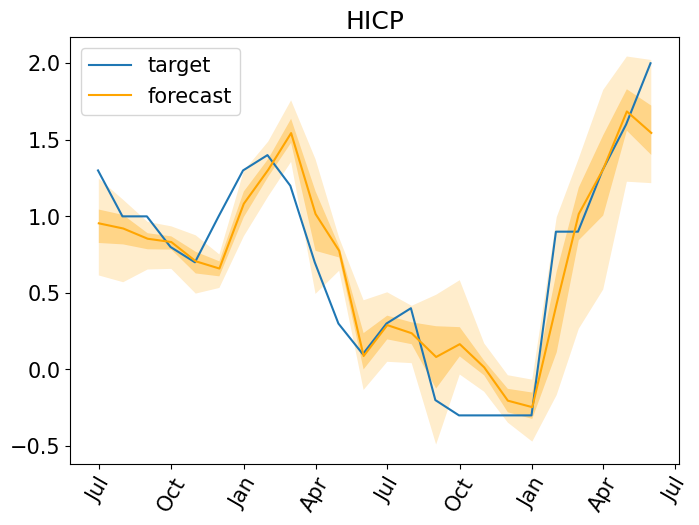

In [33]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b')
plt.rcParams.update({'font.size': 15})

# Resample the daily forecasts to monthly frequency
#monthly_forecasts = [forecast.resample('M').mean() for forecast in forecasts]
#
#monthly_forecasts = [pd.DataFrame(forecast.samples).T.resample('M').mean() for forecast in forecasts]
# Iterate through the first 9 series, and plot the predicted samples
# for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
#     ax = plt.subplot(3, 3, idx+1)

#     plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
#     forecast.plot( color='g')
#     plt.xticks(rotation=60)
#     ax.xaxis.set_major_formatter(date_formater)
#     ax.set_title(forecast.item_id)

ax = plt.subplot(3, 3, 1)

#plt.plot(tss[0][-4 * prediction_length:].to_timestamp(), label="target", )
plt.plot(y[-24:], label="target", )
#fcst[0][0].plot( color='g')
#plt.plot(pp_months.index, pp_months['col1'], label="forecast")
model_example.plot(color='orange')
plt.gca().get_lines()[-1].set_label('forecast')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(date_formater)
ax.set_title('HICP')

plt.gcf().tight_layout()
plt.legend()
plt.show()

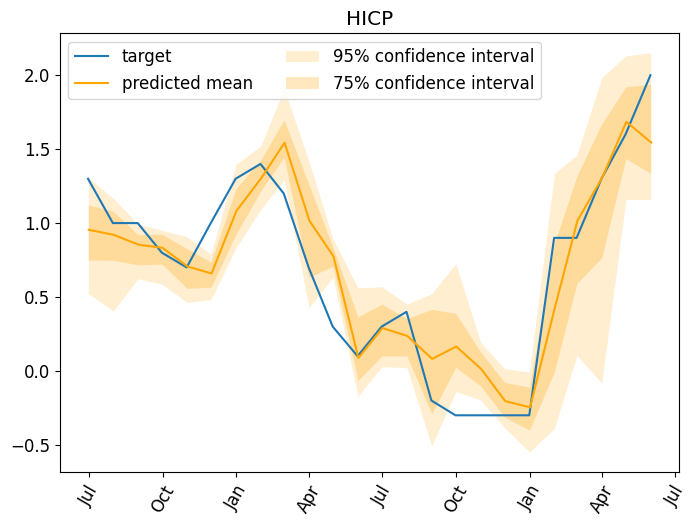

In [34]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b')
plt.rcParams.update({'font.size': 12})

# Resample the daily forecasts to monthly frequency
#monthly_forecasts = [forecast.resample('M').mean() for forecast in forecasts]
#
#monthly_forecasts = [pd.DataFrame(forecast.samples).T.resample('M').mean() for forecast in forecasts]
# Iterate through the first 9 series, and plot the predicted samples
# for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
#     ax = plt.subplot(3, 3, idx+1)

#     plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
#     forecast.plot( color='g')
#     plt.xticks(rotation=60)
#     ax.xaxis.set_major_formatter(date_formater)
#     ax.set_title(forecast.item_id)

ax = plt.subplot(3, 3, 1)

#plt.plot(tss[0][-4 * prediction_length:].to_timestamp(), label="target", )
plt.plot(y[-24:], label="target", )
#fcst[0][0].plot( color='g')
#plt.plot(pp_months.index, pp_months['col1'], label="forecast")
model_example.plot(intervals = (0.95, 0.75), color='orange')
plt.gca().get_lines()[-1].set_label('forecast')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(date_formater)
ax.set_title('HICP')

plt.gcf().tight_layout()
plt.legend(['target', 'predicted mean', '95% confidence interval', '75% confidence interval'], ncol=2)
plt.show()

In [35]:
obj = fcst[0][0]
into_dataframe  = PandasDataset(pp_months) 

print(type(obj))

<class 'gluonts.model.forecast.SampleForecast'>


In [36]:
results = pd.DataFrame(mean_results, columns=['HICP Predictions'])
results

,HICP Predictions
0,0.941354
1,0.893563
2,0.831743
3,0.820222
4,0.694350
5,0.653780
6,1.081570
7,1.314073
8,1.559854
9,0.970250


In [37]:
model_example.samples[0]

array([ 0.9706259 ,  0.7888756 ,  0.79577583,  0.58755904,  0.64762056,
        0.5452417 ,  1.1445346 ,  1.211637  ,  1.2802578 ,  0.810459  ,
        0.69924474, -0.05788314,  0.15729886,  0.31660888, -0.02704559,
        0.17459507, -0.06806725, -0.3442702 , -0.22078374,  0.92313665,
        0.95970035,  1.6430209 ,  1.5450784 ,  1.6605477 ], dtype=float32)

In [38]:

start_date = '2019-06-30 '
end_date = '2021-05-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')
results.index = date_range

# Print the DataFrame
print(results)


            HICP Predictions
2019-06-30          0.941354
2019-07-31          0.893563
2019-08-31          0.831743
2019-09-30          0.820222
2019-10-31          0.694350
2019-11-30          0.653780
2019-12-31          1.081570
2020-01-31          1.314073
2020-02-29          1.559854
2020-03-31          0.970250
2020-04-30          0.768148
2020-05-31          0.137254
2020-06-30          0.280195
2020-07-31          0.235415
2020-08-31          0.052464
2020-09-30          0.200410
2020-10-31          0.003214
2020-11-30         -0.200662
2020-12-31         -0.249465
2021-01-31          0.412628
2021-02-28          0.961226
2021-03-31          1.239049
2021-04-30          1.687873
2021-05-31          1.587966


In [39]:
y[-24:]

2019-06-30    1.3
2019-07-31    1.0
2019-08-31    1.0
2019-09-30    0.8
2019-10-31    0.7
2019-11-30    1.0
2019-12-31    1.3
2020-01-31    1.4
2020-02-29    1.2
2020-03-31    0.7
2020-04-30    0.3
2020-05-31    0.1
2020-06-30    0.3
2020-07-31    0.4
2020-08-31   -0.2
2020-09-30   -0.3
2020-10-31   -0.3
2020-11-30   -0.3
2020-12-31   -0.3
2021-01-31    0.9
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
Name: HICP, dtype: float64

In [40]:
print(y[-24:])

2019-06-30    1.3
2019-07-31    1.0
2019-08-31    1.0
2019-09-30    0.8
2019-10-31    0.7
2019-11-30    1.0
2019-12-31    1.3
2020-01-31    1.4
2020-02-29    1.2
2020-03-31    0.7
2020-04-30    0.3
2020-05-31    0.1
2020-06-30    0.3
2020-07-31    0.4
2020-08-31   -0.2
2020-09-30   -0.3
2020-10-31   -0.3
2020-11-30   -0.3
2020-12-31   -0.3
2021-01-31    0.9
2021-02-28    0.9
2021-03-31    1.3
2021-04-30    1.6
2021-05-31    2.0
Name: HICP, dtype: float64


In [41]:
reshaped_results = pd.Series(results.values.ravel())
reshaped_results.index = date_range
reshaped_results.rename('HICP Predictions', inplace=True)
results_2 = reshaped_results + trend[-25:-1] + seasonal[-25:-1]
results_2 = results_2.rename('HICP Predictions')



In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
evaluation = pd.concat([y[-24:], results], axis=1)
#evaluation = pd.concat([y[-24:], results_2], axis=1)

mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])
mse = mean_squared_error(evaluation['HICP'], evaluation['HICP Predictions'])
r2 = r2_score(evaluation['HICP'], evaluation['HICP Predictions'])

n = evaluation.shape[0]
k = 4

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
correlation1 = evaluation['HICP'].corr(evaluation['HICP Predictions'])

print("Lag-Llama - Correlation between True Data and Predictions:", correlation1)

LagLlama_results = pd.Series([mae, mape, mse, r2, adjusted_r2, correlation1])

print("Adjusted R-squared:", adjusted_r2)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("Mean Squared Error:", mse)


Lag-Llama - Correlation between True Data and Predictions: 0.9203212927263723
Adjusted R-squared: 0.8070675655686369
R-squared: 0.8406210324262653
Mean Absolute Error: 0.2060458619419175
Mean Absolute Percentage Error: 0.40058437798498786
Mean Squared Error: 0.06813450863777158


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mae = mean_absolute_error(evaluation['HICP'], evaluation['HICP Predictions'])
mape = mean_absolute_percentage_error(evaluation['HICP'], evaluation['HICP Predictions'])

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 0.2060458619419175
Mean Absolute Percentage Error: 0.40058437798498786


In [44]:
correlation2 = evaluation['HICP'].corr(evaluation['HICP Predictions'])

print("Lag-Llama - Correlation between True Data and Predictions:", correlation2)

Lag-Llama - Correlation between True Data and Predictions: 0.9203212927263723


### Monthly data predictions

In [53]:


#Lama_dataset = pd.concat([y, exogenous], axis=1)
exogenous_monthly = exogenous.resample('M').mean()
exogenous_monthly
y_monthly = df_3['HICP - Overall index (ICP.M.U2.N.000000.4.ANR)'].rename('HICP')['2010-08-01':'2021-08-01']
y_monthly

Lama_dataset = pd.concat([y_monthly, exogenous_monthly], axis=1)

Lama_dataset = Lama_dataset.astype('float32')
data = PandasDataset(Lama_dataset, target = 'HICP') 


In [48]:
# Ensure that the indices you are using are integers
backtest_dataset = data
prediction_length = 1  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timestep

,OIL,LIBOR_3M,INTEREST_SPREAD,USD/EUR exchange rate,Eurostoxx50_index,EUR/CNY exchange rate
2010-08-31,-0.008486,0.015812,-0.085790,0.037671,-0.036903,0.019769
2010-09-30,0.011908,-0.001954,0.030269,-0.024628,-0.036903,-0.014006
2010-10-31,0.010986,0.097135,0.020391,-0.031466,-0.036903,-0.007914
2010-11-30,0.007863,0.015065,0.027346,0.022151,-0.036903,0.015611
2010-12-31,0.020489,-0.021821,0.038223,0.010690,-0.036903,0.003170
...,...,...,...,...,...,...
2021-03-31,-0.006052,-0.001939,-0.018835,0.005365,0.013885,0.021978
2021-04-30,0.010312,-0.004656,0.096826,0.005459,0.015373,0.021978
2021-05-31,0.008840,0.001517,0.052066,0.005459,0.005061,0.021978
2021-06-30,0.020294,0.003157,0.015197,0.005459,0.004461,0.021978


In [ ]:
import pandas as pd

fcst = []

# Initialize start and end dates
start_date = pd.to_datetime('2010-08-01')
end_date = pd.to_datetime('2019-07-01')

# Define the rolling window size
window_size = 2400

while end_date <= pd.to_datetime('2021-06-01'):
    # Adjust the end date to be the last date of the previous month
    
    # Create a new dataframe with the desired end date
    df = Lama_dataset[start_date:adjusted_end_date]
    
    # Limit the dataframe to the last 'window_size' rows
    df = df[-window_size:]
    df = PandasDataset(df, target='HICP')
    
    forecasts, tss = get_lag_llama_predictions(df, prediction_length, num_samples)
    fcst.append(forecasts)
    
    # Increase the end date by one month
    end_date += pd.DateOffset(months=1)